In [1]:
# %matplotlib notebook
# tells your notebook that you are going to be mapping things and gives an interactive chart

In [2]:
#IMPORT IN 
import random # Import random at top if need a random generater
# import csv # Import if using Python without Pandas to call in a csv file

import os  #Use to create readable paths
import pandas as pd  # Use to manage dataframes
import numpy as np # Used for calculations 
import matplotlib.pyplot as plt  # Used for charting
from scipy import stats

# PANDAS

### Dealing with CSVs

In [3]:
#HOW TO CALL IN A FILE PATH
in_path = os.path.join("pandas_input.csv")
out_path = os.path.join("pandas_output.csv")

#HOW TO READ IN A CSV FILE
df_name = pd.read_csv(in_path, encoding="UTF-8")

df_name.head(2)

,column1,column2,column3,column4,column5,column6,column7,column8,column9,column10,column11,column12,column13,column14,column15,column16
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679


In [4]:
# HOW TO WRITE IN A CSV FILE in PANDAS
df_name.to_csv(out_path, index=False, header=True)

### Basic Dataset Cleanup

In [5]:
#Reorganize columns
df_name = df_name[["column1", "column2", "column4", "column16", "column11"]]
#Rename columns
df_name = df_name.rename(columns={"column1":"column_1","column2":"column_2","column4":"column_3", "column16": "column_4"})
#Reset a column as the index
df_name = df_name.set_index("column_1")

# Delete a column
del df_name['column11']

# To drop missing data
df_name = df_name.dropna(how="any")

# Use to replace EMPTY cells with zero result.fillna(0, inplace=True)

# You can cast the files to numberic
df_name['column_4']=pd.to_numeric(df_name["column_4"])

# FILTERING
new_df_name = df_name.loc[df_name["column_2"] == "N", :] #where N is the value

# GROUPING
group_df = df_name.groupby(['column_2'])
df_name.groupby(['column_1', 'column_2'])

# You can add new columns using operations
df_name ["new column"]= df_name["column_3"]+df_name["column_4"]

# You can SORT
df_name = df_name.sort_values ("column_2", ascending=False)  #defaults to true

# To reset the index and drop the old list of numbers
df_name = df_name.reset_index (drop = False)
# Reset the index to a specific column
df_new = df_name.set_index('column_1')

df_name.head()

,column_1,column_2,column_3,column_4,new column
0,Muesli Raisins; Dates; & Almonds,R,150,37.136863,187.136863
1,Double Chex,R,100,44.330856,144.330856
2,Corn Chex,R,110,41.445019,151.445019
3,Rice Chex,R,110,41.998933,151.998933
4,Bran Chex,R,90,49.120253,139.120253


### Common Dataset Functions

In [6]:
#List of column names
print("List of column names")
print(df_name.columns)

#count/mean/max/min/first of values 
print("****************************")
print("Count of rows")
print(df_name["column_2"].count())
#can also be done on grouped data
print("****************************")
print("Count of grouped rows")
print(group_df.count())

#List of unique values
print("****************************")
print("List of Unique values")
print(df_name["column_2"].unique())

#Number of unique avalues
print("****************************")
print("# of Unique values")
print(df_name.nunique())

# Types in each column
print("****************************")
print("types")
print(df_name.dtypes)

# unique values in the column
print("****************************")
print("nunique values with counts")
print(df_name ['column_2'].value_counts())

# Can also do the above while keeping it a data frame using the groupby
print("****************************")
print("Count of rows as df")
print(df_name.groupby ("column_2").count () [["column_1"]])

List of column names
Index(['column_1', 'column_2', 'column_3', 'column_4', 'new column'], dtype='object')
****************************
Count of rows
77
****************************
Count of grouped rows
          column_3  column_4  new column
column_2                                
A                1         1           1
G               22        22          22
K               23        23          23
N                6         6           6
P                9         9           9
Q                8         8           8
R                8         8           8
****************************
List of Unique values
['R' 'Q' 'P' 'N' 'K' 'G' 'A']
****************************
# of Unique values
column_1      77
column_2       7
column_3      11
column_4      77
new column    77
dtype: int64
****************************
types
column_1       object
column_2       object
column_3        int64
column_4      float64
new column    float64
dtype: object
****************************
nunique valu

### LOC/ILOC, Merging, and Binning

In [7]:
# LOC and ILOC - TO ITENTIFY SECTIONS
# | for OR and & for AND

# Loc to use the names of the columns or sections (rows, columns) rows must be the index
# Use : empty to use slice function instead of any of the values
df_new = df_name.set_index('column_2')
select_df = df_new.loc[["G", "R"],["column_3", "column_4"]]

# You can also use loc to filter
Over_120_df = select_df.loc[select_df["column_3"]>= 120]
print(Over_120_df.head())

# iloc to get the ranges of rows comma ranges of columns REMEMBER 0 index and includes last value
iloc_df = select_df.iloc[0:3,0:1] # [row,column] you can leave a singe : to include all
print(iloc_df)

          column_3   column_4
column_2                     
G              140  28.592785
G              130  37.038562
G              120  19.823573
G              130  30.450843
R              150  37.136863
          column_3
column_2          
G              110
G              110
G              110


In [8]:
# MERGING

# merge_table_name = pd.merge(dataframe_name1, dataframe_name2, on="matching_column") can add optional how="outer" or left or right
# Inner join - will drop anything where both don't match by default
# For Outer join - will put NaN if missing from the other one or keep all right or all left only
# Can also optionally add suffixes =("_x", "y")

In [9]:
# BINNING
#Creating groupings og data
bins = [0, 50, 75, 100, 120, 150, 200, 999] # first is less than or equal to 60
group_names = ["<50", "50-75", "75-100", "100-120", "120-150","150-200",">200"] # One less than the bin
df_name["New column name"] = pd.cut(df_name["column_3"], bins, labels=group_names) 
#You can then get data by that binned column
df_group_name = df_name.groupby("New column name")

df_group_name[["column_1", "column_2"]].nunique()

,column_1,column_2
New column name,,
<50,3,2
50-75,2,2
75-100,25,7
100-120,39,5
120-150,7,3
150-200,1,1
>200,0,0


### CREATING DATAFRAMES

In [10]:
#simple is:
#d = {'col1': [1, 2], 'col2': [3, 4]}

# You can group by a column and then get aggregations on the data
df_mean = df_name["column_3"].mean()
df_sum = df_name["column_3"].sum()

# Creating a new DataFrame using both duration and count
summary_df = pd.DataFrame({"Mean": [df_mean],
                           "Sum": [df_sum]})

print(summary_df)

# ALTERNATIVLY: You can create one with grouped data this way
summary_group_df = df_name.groupby("column_2").mean()[["column_3"]]
summary_group_df = summary_group_df.rename(columns = {"column_3": "Mean"}) #renames the first column
summary_group_df ["Sum"] = group_df.sum()[["column_3"]]
summary_group_df["Count"] = df_name.groupby("column_2").nunique()[["column_1"]]
summary_group_df["Sum per Count"] = summary_group_df ["Sum"]/summary_group_df["Count"] 

print(summary_group_df)


         Mean   Sum
0  106.883117  8230
                Mean   Sum  Count  Sum per Count
column_2                                        
A         100.000000   100      1     100.000000
G         111.363636  2450     22     111.363636
K         108.695652  2500     23     108.695652
N          86.666667   520      6      86.666667
P         108.888889   980      9     108.888889
Q          95.000000   760      8      95.000000
R         115.000000   920      8     115.000000


In [11]:
# ALTERNATIVLY: You can use the aggregation function
gp_df = df_name
gp_df ["column3 sum"]= gp_df["column_3"]
gp_df ["column3 mean"]= gp_df["column_3"]
gp_df ["column1 count"]= gp_df["column_1"]

summary_gp_df = gp_df.groupby("column_2").agg({ "column3 mean": "mean", "column3 sum":"sum","column1 count": "nunique"})
summary_gp_df["Sum per Count"]= summary_gp_df["column3 sum"]/summary_gp_df["column1 count"]
summary_gp_df.head()



,column3 mean,column3 sum,column1 count,Sum per Count
column_2,,,,
A,100.000000,100,1,100.000000
G,111.363636,2450,22,111.363636
K,108.695652,2500,23,108.695652
N,86.666667,520,6,86.666667
P,108.888889,980,9,108.888889


## Indexes and Transposing

In [12]:
#Get the index as a passable array list
print(df_group_name.groups.keys()) # Used on a groupby object 
# can use keys on anything to get the list of variables

print(iloc_df.index.tolist()) # Used on a regular dataframe

# you can also transpose a list into an array (or create an array from a single row of data)
summ = summary_df.values.T.tolist()
print(summ)

dict_keys(['<50', '50-75', '75-100', '100-120', '120-150', '150-200', '>200'])
['G', 'G', 'G']
[[106.88311688311688], [8230.0]]


### Mapping

In [13]:
#Only do it at the end of analysis as it changes the output of your data

#Dollars
summary_group_df["Sum"] = summary_group_df["Sum"].map("${:,.2f}".format)

#2 decimals
summary_group_df["Mean"] = summary_group_df["Mean"].map("{:.2f}".format)

#to convert to float first:
summary_group_df["Mean"] = summary_group_df["Mean"].astype(float).map("{:.3f}".format)
#to convert from dollars
summary_group_df['Sum'] = summary_group_df['Sum'].replace('[\$,]','',regex=True).astype(float)

#Thousands
summary_group_df["Sum"] = summary_group_df["Sum"].map("{:,.0f}".format)


summary_group_df

,Mean,Sum,Count,Sum per Count
column_2,,,,
A,100.000,100,1,100.000000
G,111.360,"2,450",22,111.363636
K,108.700,"2,500",23,108.695652
N,86.670,520,6,86.666667
P,108.890,980,9,108.888889
Q,95.000,760,8,95.000000
R,115.000,920,8,115.000000


# MATPLOTLIB and NUMPY

## CHARTS

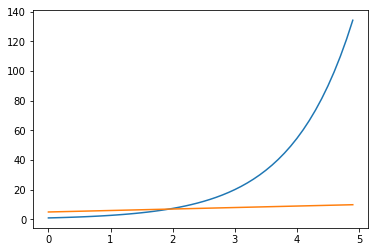

In [14]:
### LINE CHART - Good over time etc.

x_axis = np.arange(0, 5, 0.1) # gives np.arrage(start, end, step)
e_x = [np.exp(x) for x in x_axis] # gives x_axis exponential
e_x2 = [(x + 5) for x in x_axis]
plt.plot(x_axis, e_x) # (x axis, y axis)
plt.plot(x_axis, e_x2) # can do a second line

# Saving the chart
plt.savefig("Images/dummy.png")
#Displaying the chart
plt.show()

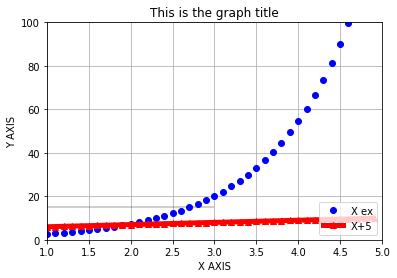

In [15]:
# MAKING THE CHARTS PRETTY

# Create a straight line
plt.hlines(15, 0, 3, alpha=0.25) # horizontal lines (y value, min x, max x, alpha is transparancy)

# Create handles for each line
ex_handle, = plt.plot(x_axis, e_x, linewidth=0, marker ='o', color='blue', label="X ex") # dont forget the comma
ex2_handle, = plt.plot(x_axis, e_x2, linewidth=5, marker='^', color='red', label="X+5") # thinkness of line
# Tell it where to put the legend
plt.legend(loc="lower right")

#Give the x and y axis lables
plt.title("This is the graph title")
plt.xlabel("X AXIS")
plt.ylabel("Y AXIS")

# Set the limits
plt.xlim(1, 5)
plt.ylim(0, 100)

# Add grid lines
plt.grid()

plt.savefig("Images/dummy.png")
plt.show()

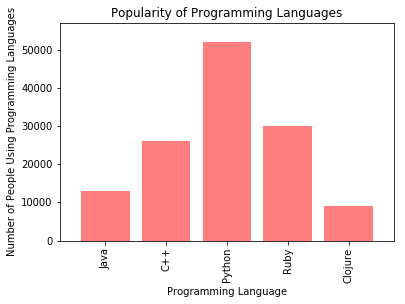

In [16]:
# BAR CHARTS - Comparing items to each other

users = [13000, 26000, 52000, 30000, 9000]
x_axis = np.arange(len(users))

plt.bar(x_axis, users, color='r', alpha=0.5, align="center", ) # center is where it is on the tick

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Java", "C++", "Python", "Ruby", "Clojure"], rotation=45, ha="right")# rotation is optional

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(users)+5000)

plt.title("Popularity of Programming Languages")
plt.xlabel("Programming Language")
plt.ylabel("Number of People Using Programming Languages")
plt.show()

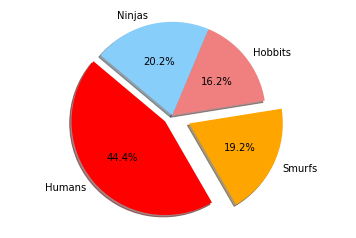

In [17]:
# PIE CHARTS - Showing items as part of a whole

labels = ["Humans", "Smurfs", "Hobbits", "Ninjas"]
sizes = [220, 95, 80, 100]
colors = ["red", "orange", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0.2, 0, 0) # seperate each portion away from the other slices

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal") # forces pie charts to have a square border (no ovals)
plt.show()

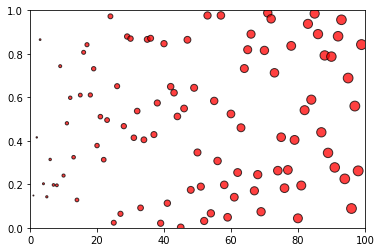

In [18]:
# SCATTER PLOTS - Showing relationships between two sets of data

x_limit = 100
x_axis = np.arange(0, x_limit, 1)
data = [random.random() for value in x_axis] # Create a random array of data that we will use for our y values

plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black", s=x_axis, alpha=0.75)#s allows you to resize based on a value
plt.ylim(0, 1)
plt.xlim(0, x_limit)
plt.show()

## Charts with Pandas

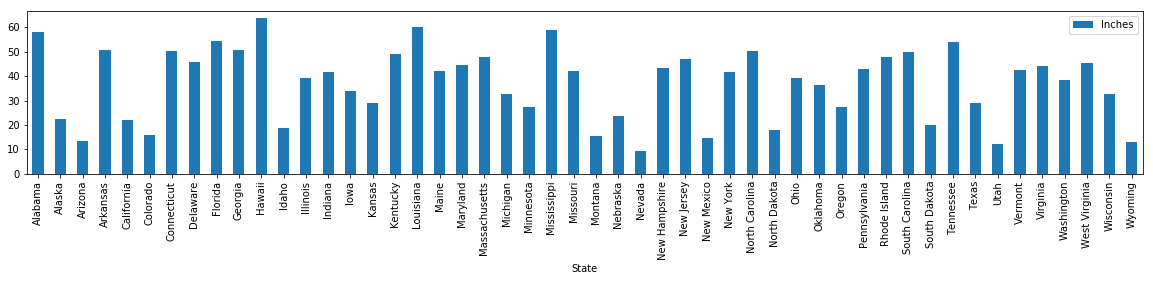

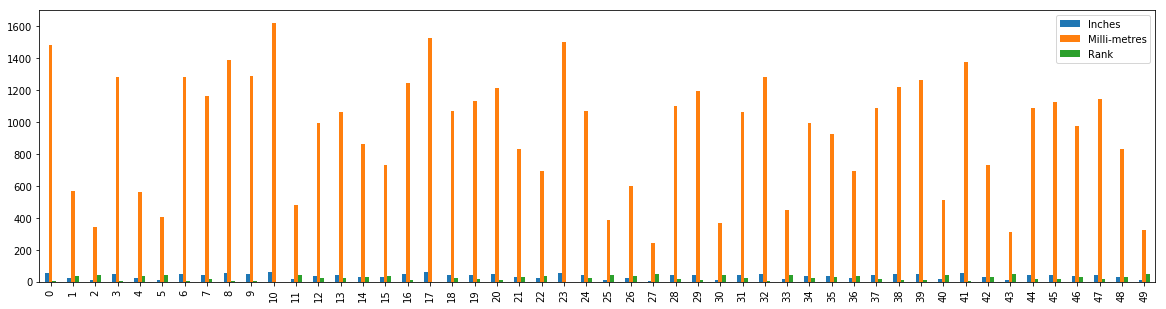

<Figure size 432x288 with 0 Axes>

In [19]:
# read in csv
rain_df = pd.read_csv("Resources/avg_rain_state.csv")

#set up x axis and ticks
x_axis = np.arange(len(rain_df))
tick_locations = [value for value in x_axis]

# DO ONLY ONE (or SOME) Columns
#Pull the two values we need
state_and_inches = rain_df[["State","Inches"]]

# Set the index to be "State" so they will be used as labels
state_and_inches = state_and_inches.set_index("State")

# Use DataFrame.plot() in order to create a bar chart of the data
state_and_inches.plot(kind="bar", figsize=(20,3))


# Pandas can also plot multiple columns if the DataFrame includes them
multi_plot = rain_df.plot(kind="bar", figsize=(20,5))

plt.show()
plt.tight_layout()

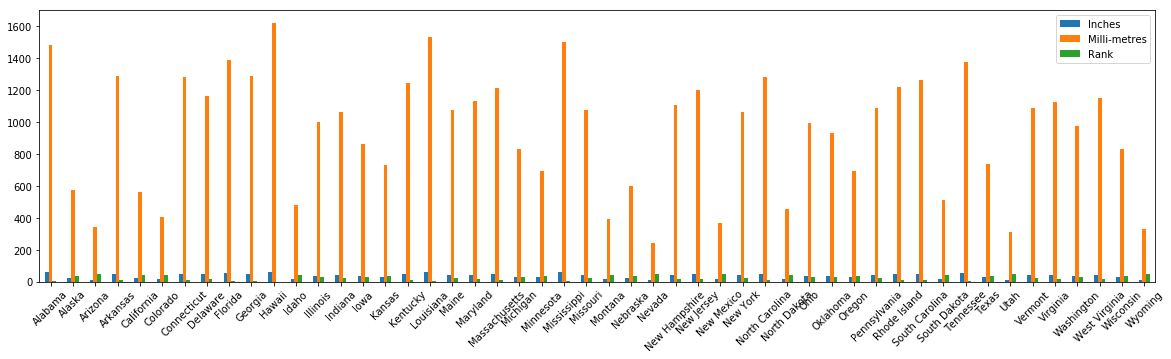

<Figure size 432x288 with 0 Axes>

In [20]:
# CAN USE ALL COLUMNS 
multi_plot = rain_df.plot(kind="bar", figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(rain_df["State"], rotation=45)

plt.show()
plt.tight_layout()

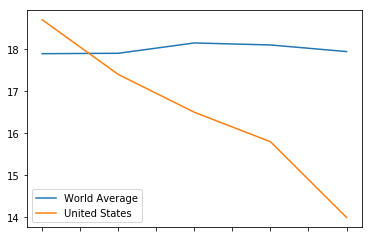

In [21]:
# Multiple lines in a single chart
# Read CSV
unemployed_data_one = pd.read_csv("Resources/unemployment_2010-2011.csv")
unemployed_data_two = pd.read_csv("Resources/unemployment_2012-2014.csv")
# Merge our two data frames together
combined_unemployed_data = pd.merge(unemployed_data_one, unemployed_data_two, on="Country Name")
combined_unemployed_data.head()
# 
del combined_unemployed_data['Country Code_y']
combined_unemployed_data = combined_unemployed_data.rename(columns={"Country Code_x":"Country Code"})
combined_unemployed_data.head()
# Add index and calculate mean
combined_unemployed_data = combined_unemployed_data.set_index("Country Code")
average_unemployment = combined_unemployed_data.mean()
average_unemployment.plot(label="World Average")
combined_unemployed_data.loc['USA', "2010":"2014"].plot(label="United States")
plt.legend()
plt.show()

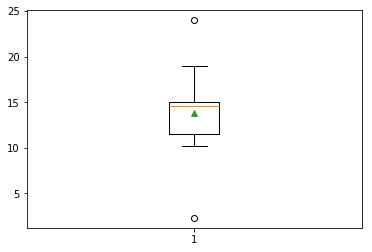

In [22]:
# BOX AND WHISKER
arr = np.array([2.3, 10.2,11.2, 12.3, 14.5, 14.6, 15.0, 15.1, 19.0, 24.0])
# percentiles (50 is median) differnce between 25 and 75 is InterQuartileRange
# Lower bound of whiskers is arr25 - 1.5 * IQR
# Upper bound of whiskers is arr75 + 1.5 * IQR
np.percentile(arr, [25,50,75])

plt.boxplot(arr, showmeans = True)
plt.show()

# STATS

### Standard Errors and Student T-Test

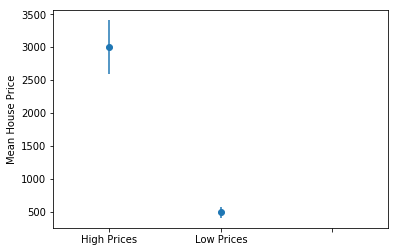

In [61]:
high_prices = [np.random.randint(1, 5) * 1000 for x in range(1, 10)]
high_means = np.mean(high_prices)
high_sem = stats.sem(high_prices)

low_prices = [np.random.randint(1, 5) * 200 for x in range(1, 10)]
low_means = np.mean(low_prices)
low_sem = stats.sem(low_prices)

means = [high_means, low_means]
sems = [high_sem, low_sem]
labels = ["High Prices", "Low Prices"]

fig, ax = plt.subplots()

ax.errorbar(np.arange(0, len(means)), means, yerr=sems, fmt="o")

ax.set_xlim(-0.5, 2.5)
ax.set_xticklabels(labels)
ax.set_xticks([0, 1, 2])

ax.set_ylabel("Mean House Price")

plt.show()

In [62]:
# t-test
usa = combined_unemployed_data.loc['USA', "2010":"2014"]
gbr = combined_unemployed_data.loc['GBR', "2010":"2014"]

(t_stat, p) = stats.ttest_ind(high_prices,low_prices, equal_var=False)

if p < 0.05:
    print("The differences between high and low prices are significant.")
else:
    print("The differences between high and low prices are due to chance.")

The differences between high and low prices are significant.


### Linear Regression

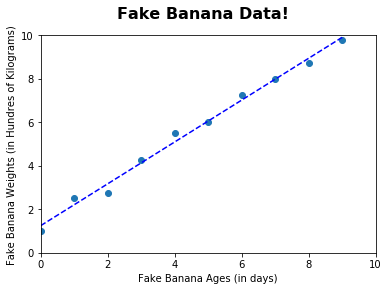

In [27]:
# Set data
x_axis = np.arange(0, 10, 1)
fake = [1, 2.5, 2.75, 4.25, 5.5, 6, 7.25, 8, 8.75, 9.8]
# Set line
(slope, intercept, _, _, _) = stats.linregress(x_axis, fake)
fit = slope * x_axis + intercept
# Plot data
fig, ax = plt.subplots()
fig.suptitle("Fake Banana Data!", fontsize=16, fontweight="bold")
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_xlabel("Fake Banana Ages (in days)")
ax.set_ylabel("Fake Banana Weights (in Hundres of Kilograms)")
ax.plot(x_axis, fake, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()